# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할 때 보다 어렵다.
- 

In [7]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv", header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)
print(train.head())
print(test.head())
print(train.count())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

---
## Preprocessing(전처리)

In [8]:
# null
train.isnull().sum().sum()

0

In [9]:
test.isnull().sum().sum()

0

In [11]:
# train과 test를 Feature와 Target으로 분리하고 정규화 하기
train_label = train.loc[:, train.columns == 0]
train_data = train.loc[:, train.columns != 0]
train_data = train_data / 225

test_label = test.loc[:, test.columns == 0]
test_data = test.loc[:, test.columns != 0]
test_data = test_data / 225

print(train_label[0:5])
print(train_data[0:5])
print('*'*20)
print(test_label[0:5])
print(test_data[0:5])

   0
0  5
1  0
2  4
3  1
4  9
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
********************
   0
0  7
1  2
2  1
3  0
4  4
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

---
## Deep Learning Model 만들기


In [12]:
# GPU 사용 설정

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3' 

In [13]:
from tensorflow import keras

In [15]:
train.shape

(20001, 785)

In [16]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation ='relu', input_shape=(784,))) 
#은닉층  #input_shape=(784,)입력층 정보를 넣어줌, 784는 즉 컬럼수 이다
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층

In [17]:
from pickletools import optimize # 경사하강법

from sklearn import metrics 


model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', # 정수
    metrics=['accuracy']
)

In [18]:
# 데이터 훈련하기
import numpy as np

model.fit(
    np.array(train_data),
    np.array(train_label),
    epochs=50
)

Epoch 1/50
626/626 [==============================] - 3s 3ms/step - loss: 0.3096 - accuracy: 0.9105
Epoch 2/50
626/626 [==============================] - 2s 3ms/step - loss: 0.1222 - accuracy: 0.9642
Epoch 3/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0776 - accuracy: 0.9767
Epoch 4/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0483 - accuracy: 0.9863
Epoch 5/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0303 - accuracy: 0.9913
Epoch 6/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0258 - accuracy: 0.9922
Epoch 7/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0178 - accuracy: 0.9951
Epoch 8/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0119 - accuracy: 0.9972
Epoch 9/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.9940
Epoch 10/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0071 - accuracy: 0.9982

---
# 테스트 데이터로 평가하기

In [19]:
score = model.evaluate(test_data, test_label)
print("loss :", score[0])
print('accuracy :', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9800
loss : 0.11229763180017471
accuracy : 0.9800199866294861


---
# test_data로 predict해보기

In [21]:
pred = model.predict(test_data)
print('test label :',test_label[:10])
print('pred :',np.argmax(pred[:10], axis=1)) #argmax는 인덱스를 의미

32/32 [==============================] - 0s 2ms/step
test label :    0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9
pred : [7 2 1 0 4 1 4 9 5 9]


In [25]:
np.array([1,4,3,2])

array([1, 4, 3, 2])

In [24]:
np.argmax(np.array([1,4,3,2]))

1

In [22]:
pred[:10] 
# 확률값으로 나온다.

array([[2.5321019e-24, 4.3481114e-23, 2.4190909e-16, 5.5457100e-14,
        1.0110214e-27, 1.0699914e-21, 1.2404115e-29, 1.0000000e+00,
        1.3864385e-19, 6.5972363e-21],
       [1.9403508e-22, 9.3685770e-09, 1.0000000e+00, 4.2400639e-11,
        7.8896676e-33, 2.7166591e-19, 1.6896891e-21, 6.2487675e-26,
        1.7808530e-20, 1.9276553e-28],
       [7.5571968e-14, 9.9999881e-01, 1.7729930e-07, 3.7142403e-12,
        1.2629138e-12, 6.7128872e-14, 3.7143930e-10, 1.0800629e-06,
        2.2833673e-09, 4.4186024e-15],
       [1.0000000e+00, 5.3741856e-21, 1.2353542e-10, 6.3599940e-18,
        7.8270460e-18, 3.8140483e-16, 5.0296372e-13, 1.9340729e-11,
        1.8135316e-22, 1.0109820e-10],
       [1.8902096e-16, 6.8589348e-23, 3.0180094e-18, 1.9406785e-20,
        1.0000000e+00, 6.8952264e-20, 1.2783902e-15, 8.6850727e-15,
        1.2545633e-15, 7.7445850e-10],
       [5.6166320e-20, 1.0000000e+00, 3.6522028e-14, 4.5672718e-17,
        3.2681951e-16, 1.5637087e-21, 5.7541575e-17, 3.25

---
# 번외 : Image 만들기

In [26]:
from PIL import Image

In [27]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns !=0]
train1.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# train data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [30]:
# Image 만들기
image =Image.fromarray((abc).astype(np.uint8))
image

In [32]:
# image 저장하기
image.save("../Data/mnist_test3.jpg","JPEG")

---
# 이미지 불러서 Predict 해보기

In [34]:
# Image 불러오기
img = Image.open('../Data/mnist_test3.jpg')

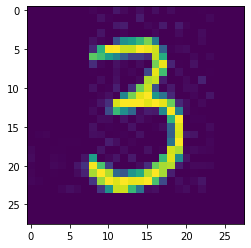

In [35]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [36]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray. shape

(28, 28)

In [37]:
# image 를 1차원 배열로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [38]:
imgArray3 = imgArray2.tolist() #numpy이 배열이 python로 변환된다.

In [39]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T

In [40]:
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print('예측값 :',np.argmax(model.predict(dfArray), axis =1))

1/1 [==============================] - 0s 27ms/step
예측값 : [3]


In [43]:
model.predict(dfArray)

1/1 [==============================] - 0s 20ms/step


array([[6.9596669e-16, 1.1911937e-10, 1.6331499e-12, 1.0000000e+00,
        1.1092343e-19, 4.0825887e-10, 5.4076677e-20, 5.1878274e-18,
        9.4788365e-15, 2.1578386e-09]], dtype=float32)